In [1]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

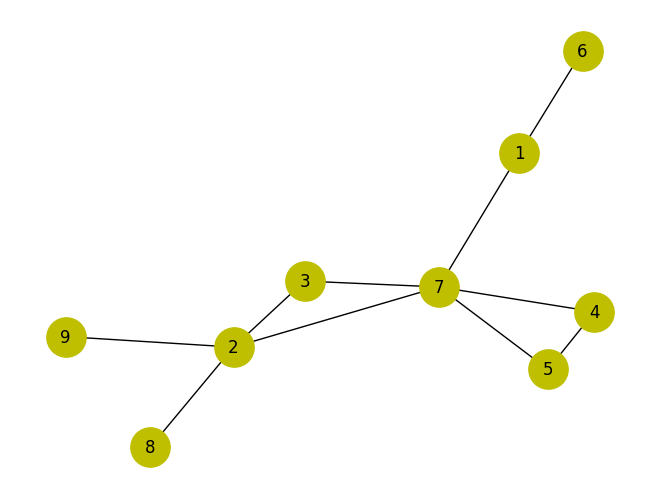

In [3]:
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='y', node_size=800)

In [4]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

In [6]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

In [7]:
centrality = nx.eigenvector_centrality(G)

sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

[(1, '0.24'),
 (2, '0.45'),
 (3, '0.36'),
 (4, '0.32'),
 (5, '0.32'),
 (6, '0.08'),
 (7, '0.59'),
 (8, '0.16'),
 (9, '0.16')]

[('Allen', '0.05'),
 ('Bob', '0.32'),
 ('Emma', '0.42'),
 ('Jill', '0.46'),
 ('John', '0.41'),
 ('Leah', '0.24'),
 ('Lisa', '0.01'),
 ('Liz', '0.25'),
 ('Mike', '0.32'),
 ('Shane', '0.35')]

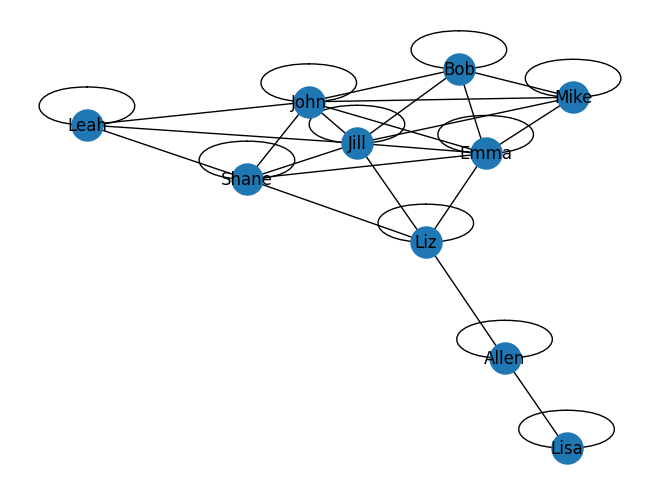

In [37]:
# Latihan 1
import itertools

edges1 = [('Bob', 'Jill', 'Mike', 'Emma', 'John'), ('Mike', 'Jill', 'Emma'), ('John', 'Jill', 'Shane', 'Leah'), ('Leah', 'Jill', 'Shane'),
          ('Emma', 'Jill', 'Shane', 'Liz'), ('Shane', 'Jill', 'Liz'), ('Liz', 'Allen'), ('Allen', 'Lisa')]
G1 = nx.Graph()
for node_tuple in edges1:
    G1.add_edges_from(itertools.combinations_with_replacement(node_tuple, 2))
nx.draw(G1, with_labels=True,  node_size=500)

# Menghitung eigenvector
centrality1 = nx.eigenvector_centrality(G1)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality1.items())

[(1, '0.29'),
 (2, '0.60'),
 (3, '0.29'),
 (4, '0.10'),
 (5, '0.10'),
 (6, '0.44'),
 (7, '0.16'),
 (8, '0.16'),
 (9, '0.16'),
 (10, '0.10'),
 (11, '0.21'),
 (12, '0.21'),
 (13, '0.10'),
 (14, '0.16'),
 (15, '0.21')]

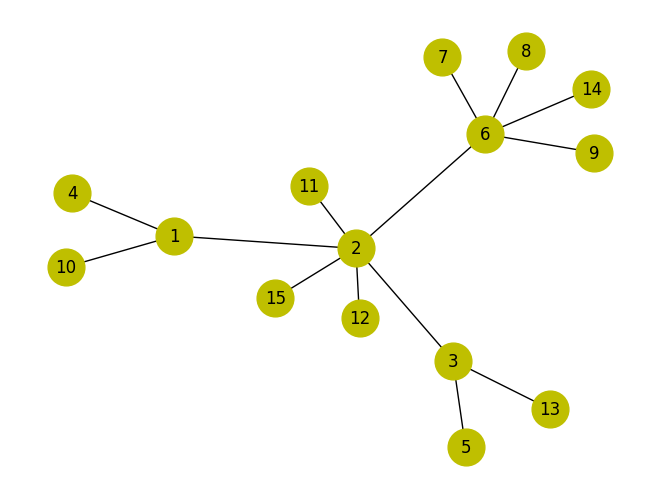

In [36]:
# Latihan 2
vertices2 = range(1, 15)
edges2 = [(9,6), (7,6), (14,6), (8,6), (6,2), (11,2), (12,2), (15,2), (2,1), (1,4), (1, 10), (2,3), (3,13), (3,5)]
G2 = nx.Graph()
G2.add_nodes_from(vertices2)
G2.add_edges_from(edges2)
nx.draw(G2, with_labels=True, node_color='y', node_size=700)

# Menghitung eigenvector
centrality2 = nx.eigenvector_centrality(G2)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality2.items())

In [4]:
# Membuat Network berdasarkan data pemodelan facebook dari Stanford

G_fb = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [5]:
print(G_fb)

Graph with 4039 nodes and 88234 edges


(-0.5957139271497727,
 1.151628925204277,
 -1.073654633462429,
 0.8276702579855919)

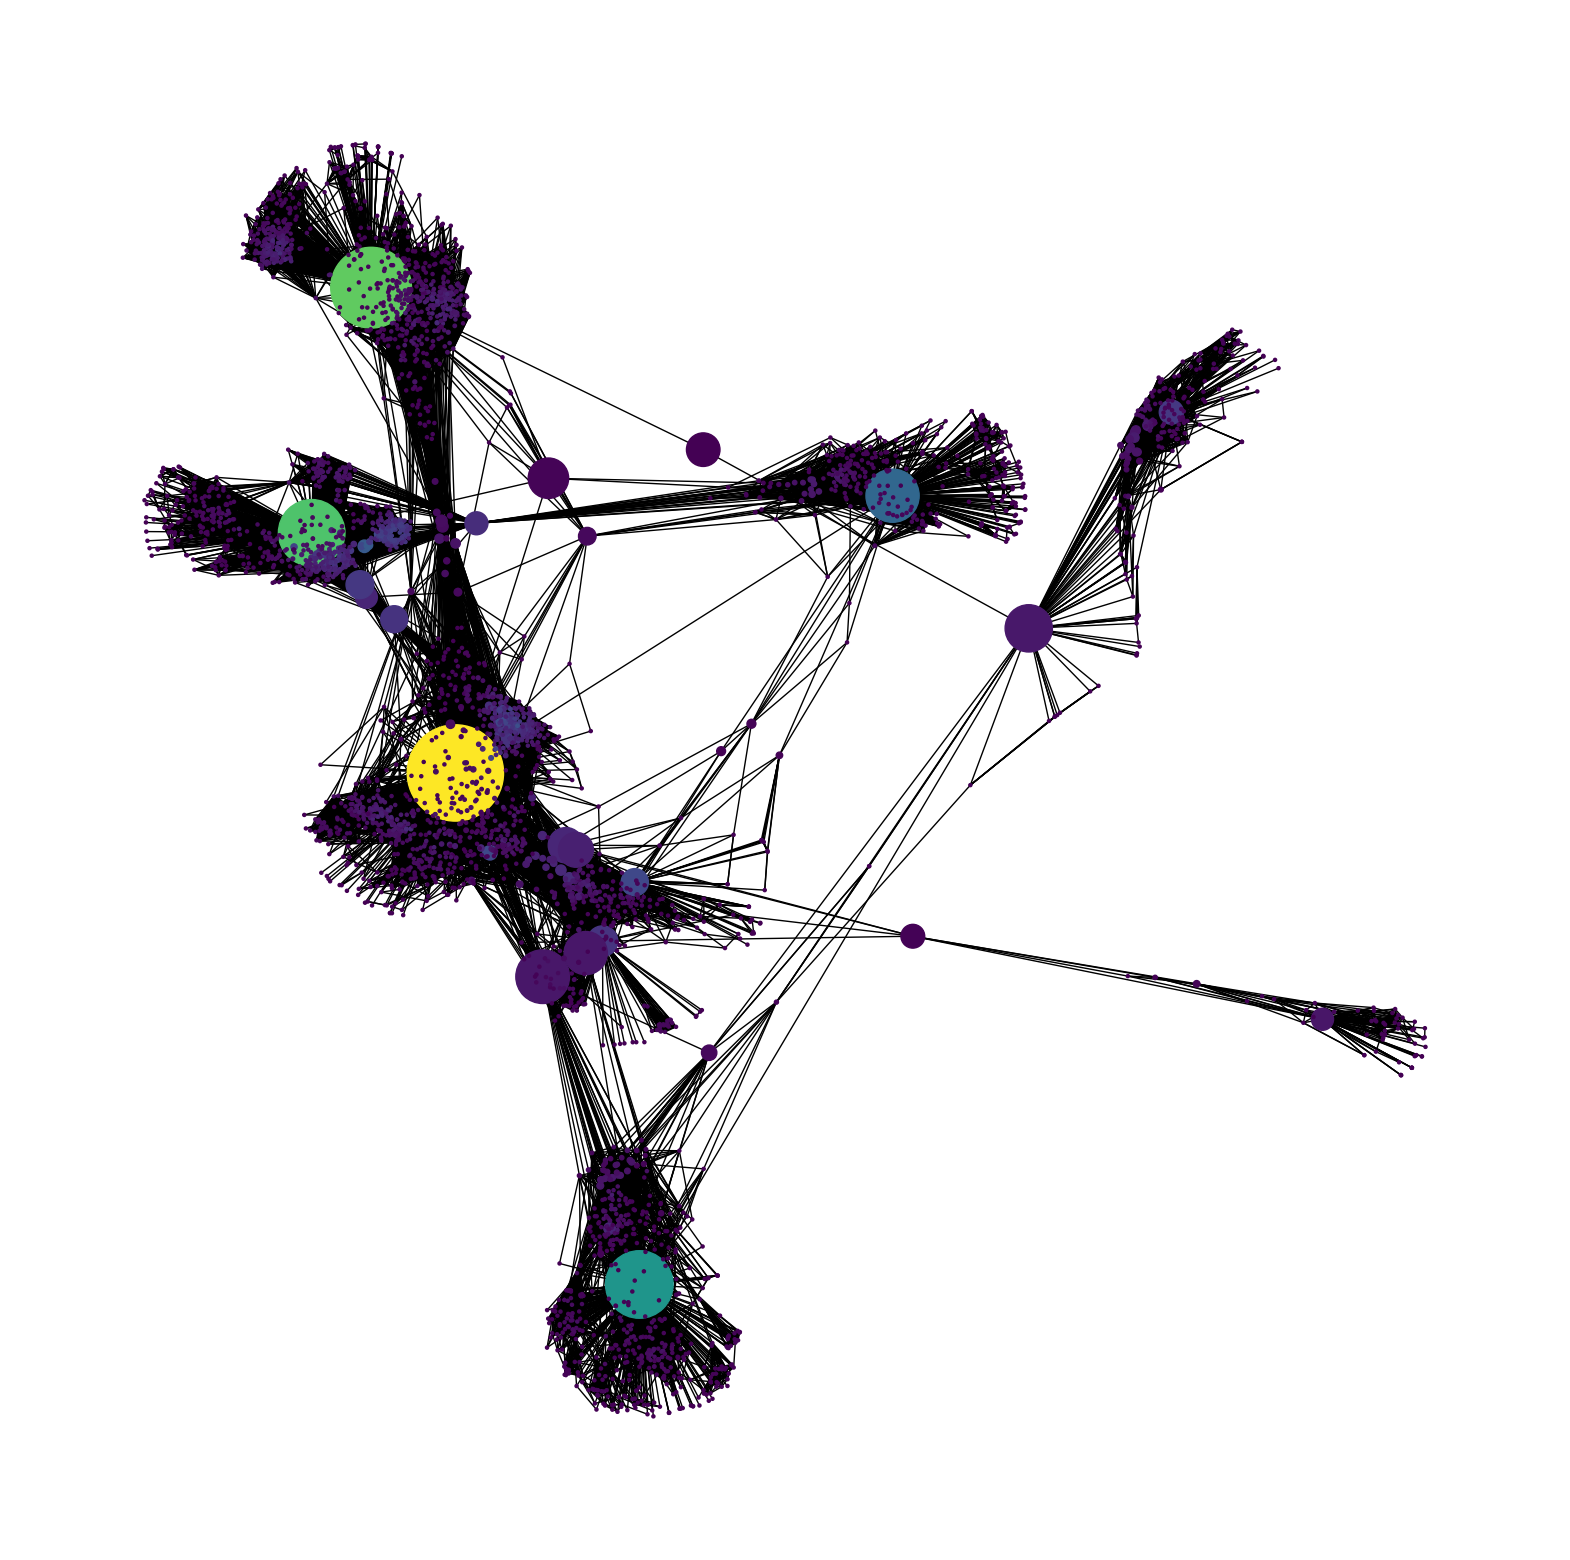

In [6]:
# Visualisasi

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color, node_size=node_size)
plt.axis('off')